In [21]:
!pip install pycaret

In [22]:
from pycaret.datasets import get_data
from pycaret.clustering import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [23]:
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [24]:
df = get_data('pokemon')

df.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


array([[<Axes: title={'center': '#'}>, <Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'HP'}>],
       [<Axes: title={'center': 'Attack'}>,
        <Axes: title={'center': 'Defense'}>,
        <Axes: title={'center': 'Sp. Atk'}>],
       [<Axes: title={'center': 'Sp. Def'}>,
        <Axes: title={'center': 'Speed'}>,
        <Axes: title={'center': 'Generation'}>]], dtype=object)

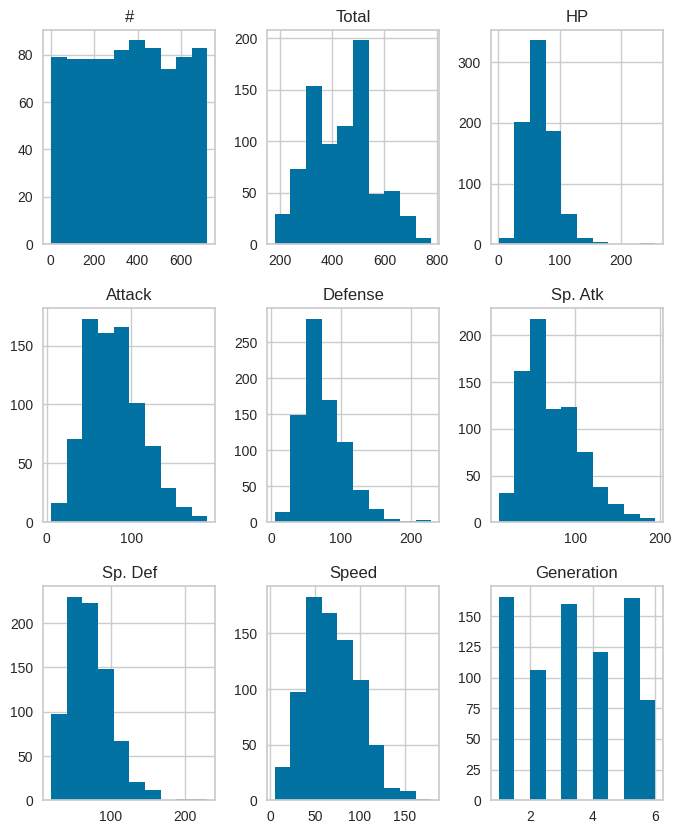

In [25]:
df.hist(figsize = (8, 10))

In [26]:
df = df.drop(['#', 'Name'], axis = 1)

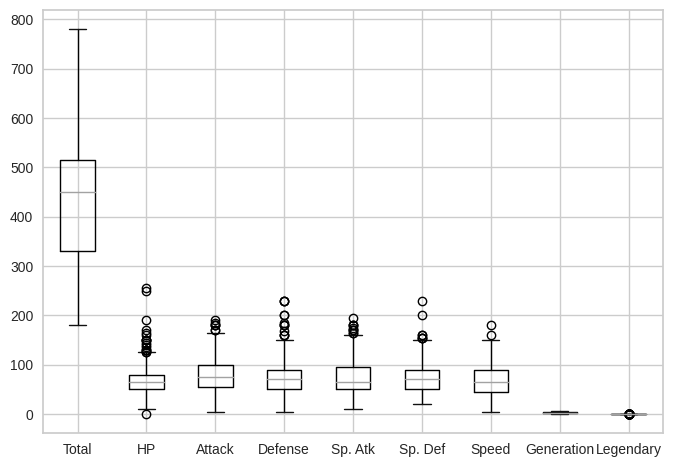

In [27]:
df.boxplot()
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in ['Type 1', 'Type 2', 'Legendary']:
    df[i] = encoder.fit_transform(df[i])

In [31]:
from pycaret.clustering import *

s = setup(df, normalize = True)

,Description,Value
0,Session id,6735
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [32]:
best = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1849,182.9459,1.9733,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [33]:
best = create_model('ap')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1231,42.8682,1.5406,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
best = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3428,71.5688,0.9140,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [35]:
best = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2559,65.8391,0.8391,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [36]:
best = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1522,166.9944,2.2025,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [37]:
best = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [38]:
best = create_model('optics')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3132,8.4923,1.4712,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [39]:
best = create_model('birch')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1585,170.6474,2.1282,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)

pca = PCA()
df = pca.fit_transform(df)

In [64]:
from pycaret.clustering import *

s = setup(df, normalize = False)
best = create_model('kmeans', num_clusters = 10)

,Description,Value
0,Session id,6586
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1229,102.4118,1.9696,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

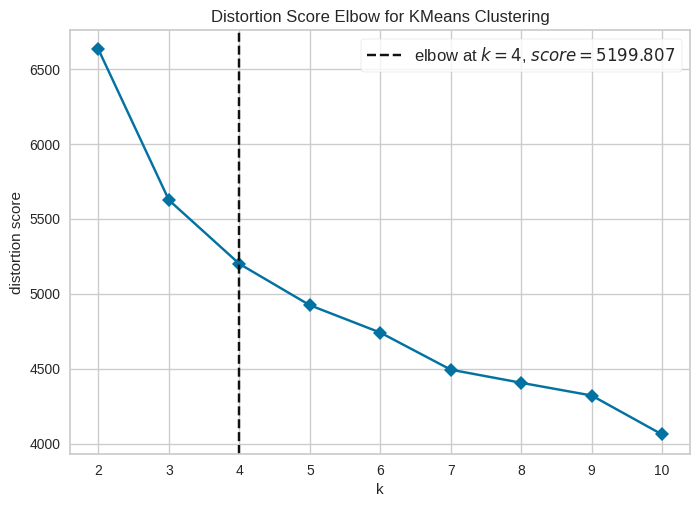

In [65]:
plot_model(best, plot = 'elbow')

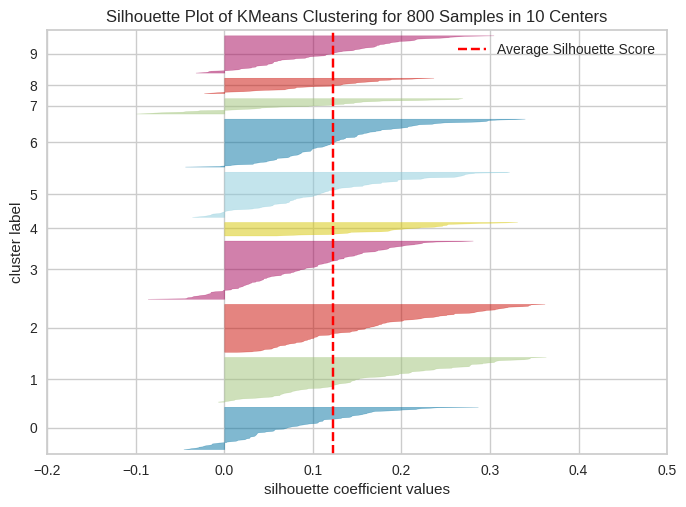

In [66]:
plot_model(best, plot = 'silhouette')

In [68]:
result = assign_model(best)
result.head(20)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,Cluster
0,-1.876598,0.142270,1.013755,-0.107034,0.593138,0.755141,0.361660,0.531752,0.417601,0.273954,-3.823743e-16,Cluster 2
1,-0.558189,0.263152,1.096428,-0.029465,0.667189,0.575872,0.591194,0.183737,0.297691,0.168413,3.096684e-15,Cluster 2
2,1.257710,0.442998,1.189446,0.077876,0.802635,0.295916,0.852054,-0.288119,0.151849,0.046460,-2.474621e-15,Cluster 3
3,2.744662,1.085730,0.876788,0.399526,1.362299,0.597685,0.639626,-0.725785,0.514226,-0.105975,-1.172978e-15,Cluster 9
4,-2.179707,-0.469267,1.505782,0.671831,0.502919,0.301268,-0.124592,0.229873,0.170862,0.015465,-1.338078e-15,Cluster 2
5,-0.720829,-0.329709,1.603757,0.753310,0.520944,0.085238,0.226064,-0.112247,0.126880,-0.191429,4.980795e-16,Cluster 6
6,1.474858,-0.694870,1.168991,-0.662809,1.287268,0.259306,0.844886,-0.239071,0.212176,-0.389089,6.014013e-16,Cluster 9
7,3.045090,-0.551657,0.640256,-1.226028,2.239076,-0.104117,0.227961,-0.349484,0.937501,-0.373065,-2.455429e-16,Cluster 9
8,3.061886,-0.726626,1.391602,-0.433054,1.238851,0.692612,1.275828,-0.739863,1.199630,0.205507,2.412253e-16,Cluster 9
9,-2.064187,1.533315,1.275899,-0.135174,-0.136547,0.644224,-0.363557,0.180542,0.093421,0.227766,-1.381172e-17,Cluster 2
